# Notebook 2: Forma de los Datos

## Homologia Persistente

In [1]:
import numpy as np # Se necesitan arrays
import scipy as sp
import pandas as pd # Para trabajar con bases de datos
import matplotlib.pyplot as plt # Para graficar
import tadasets # for generating sample data
import ripser # for computing persistence diagrams
import persim # for comparing persistence diagrams
import gudhi as gd#Para hacer la filtracion de complejos simpliciales de Rips y Alpha
#import plotly.graph.objects as go # for plotting persistence diagrams
plt.rcParams.update(plt.rcParamsDefault)

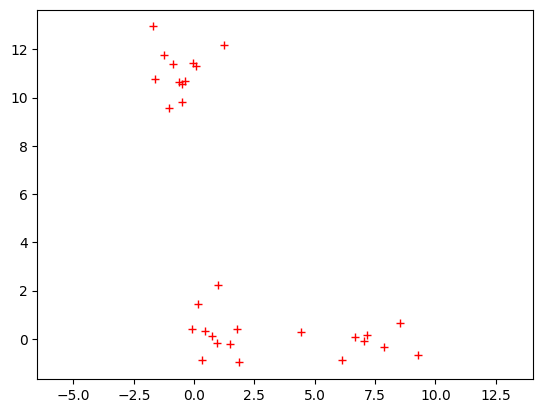

In [2]:
np.random.seed(0)
X1 = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size=10)
X2 = np.random.multivariate_normal([7,0],np.array([[1,0],[0,0.2]]),size=8)
X3= np.random.multivariate_normal([0,11],np.array([[1,0],[0,1]]),size=12)
X = np.concatenate((X1,X2,X3))

plt.plot(X[:,0],X[:,1],'r+')
plt.axis('equal')
plt.show()

In [3]:
from scipy.spatial import distance_matrix
DX = distance_matrix(X,X,2)

usetex mode requires dvipng.


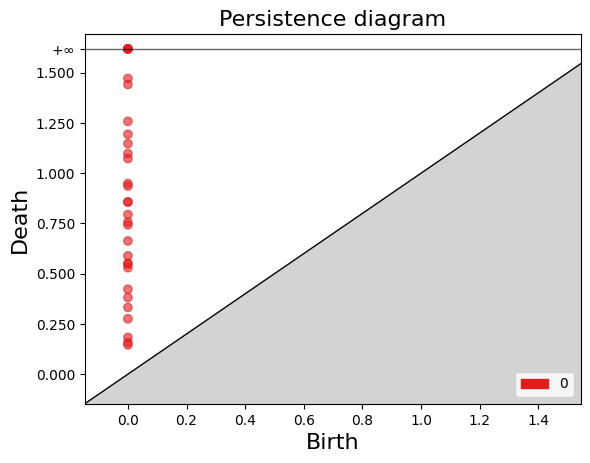

In [4]:
skeletonX = gd.RipsComplex(distance_matrix = DX, max_edge_length = 2)

#Aqui vamos a pedir que nuestro complejo sea maximo de 1 dimension, solo vertices y aristas
Rips_simplex_tree_X = skeletonX.create_simplex_tree(max_dimension = 1)
Barcodes_Rips_X = Rips_simplex_tree_X.persistence()
Barcodes_Rips_X[0:20]
gd.plot_persistence_diagram(Barcodes_Rips_X)
plt.show()

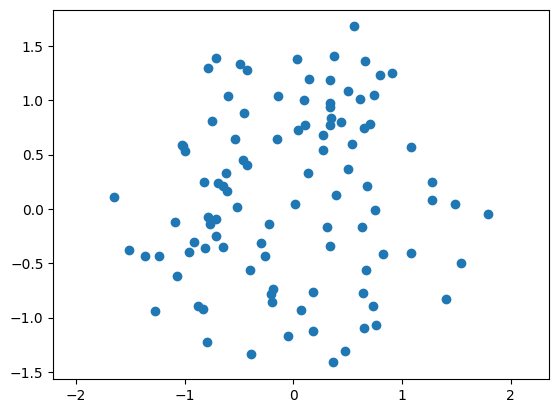

In [5]:
np.random.seed(2879)
datos_Circunferencia = tadasets.dsphere(n=100, d=1, noise=0.3,r=1) #esta es una esfera de dimension d-1 en el plano
plt.scatter(datos_Circunferencia[:,0],datos_Circunferencia[:,1])
plt.axis('equal')
plt.show()

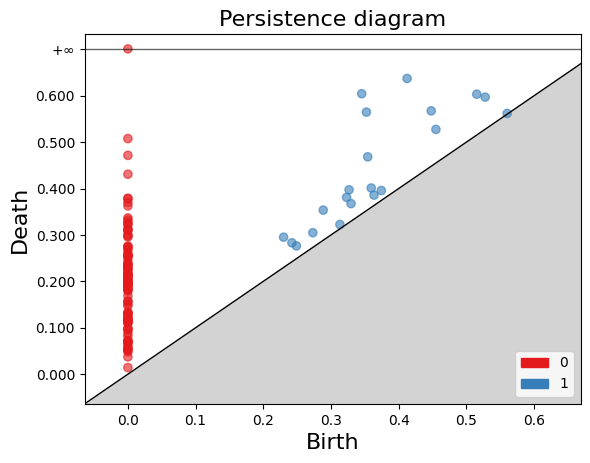

In [6]:
skeletonX = gd.RipsComplex(points=datos_Circunferencia, max_edge_length = 2)

#Aqui vamos a pedir que nuestro complejo sea maximo de 1 dimension, solo vertices y aristas
Rips_simplex_tree_X = skeletonX.create_simplex_tree(max_dimension = 2)
Barcodes_Rips_X = Rips_simplex_tree_X.persistence()
gd.plot_persistence_diagram(Barcodes_Rips_X)
plt.show()

## Ripser

In [7]:
def diagram_sizes(dgms):
    return ", ".join([f"|$H_{i}$|={len(d)}" for i, d in enumerate(dgms)])
# Aqui almacenamos la cantidad de generadores de cada espacio de homología. Estas cantidades se muestran en la impresión
# (puedes omitirlo si gustas, por supuesto haciendo los cambios necesarios en el código del diagrama)

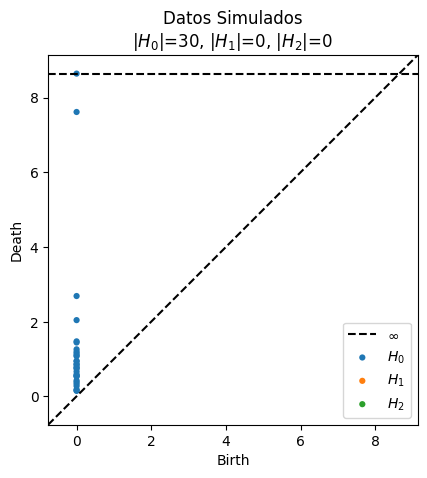

In [8]:
dgm_X = ripser.ripser(X,maxdim=2)['dgms'] # Computamos los diagramas de persistencia de los datos
persim.plot_diagrams(dgm_X, show=True,title=f"Datos Simulados\n{diagram_sizes(dgm_X)}")

In [9]:
circle = tadasets.dsphere(n=100, d=1, noise=0.3,r=1) #esta es una esfera de dimension d-1 en el plano


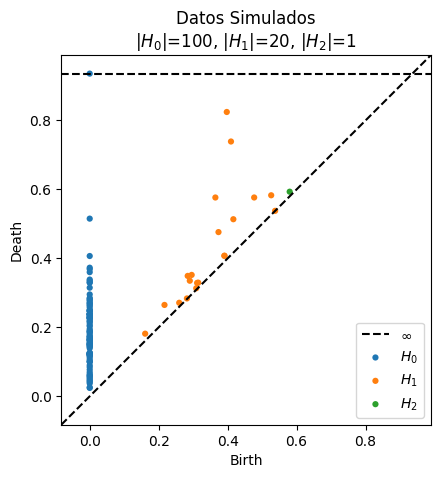

In [10]:
dgm_X = ripser.ripser(circle,maxdim=2)['dgms'] # Computamos los diagramas de persistencia de los datos
persim.plot_diagrams(dgm_X, show=True,title=f"Datos Simulados\n{diagram_sizes(dgm_X)}")

In [11]:
a1 = np.random.uniform(0,2*np.pi,500)
a2 = np.random.uniform(0,2*np.pi,500)
r1 = np.random.uniform(0.99,1,500)
r2 = np.random.uniform(3.99,4,500)

X = ((r1*np.cos(a1)+r2)*np.cos(a2))
x = np.asarray(X)
Y = ((r1*np.cos(a1)+r2)*np.sin(a2))
y = np.asarray(Y)
Z = r1*np.sin(a1)
z = np.asarray(Z)

Data = []
for i in range(len(X)):
    Data.append([x[i],y[i],z[i]])
    

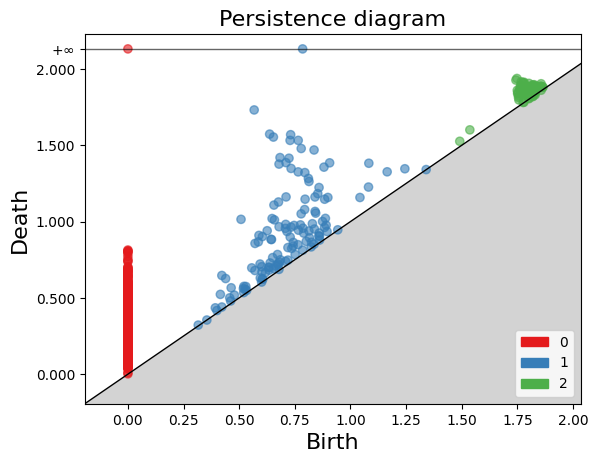

In [12]:
skeletonX = gd.RipsComplex(points=Data, max_edge_length = 3)

#Aqui vamos a pedir que nuestro complejo sea maximo de 1 dimension, solo vertices y aristas
Rips_simplex_tree_X = skeletonX.create_simplex_tree(max_dimension = 3)
Barcodes_Rips_X = Rips_simplex_tree_X.persistence()
gd.plot_persistence_diagram(Barcodes_Rips_X)
plt.show()

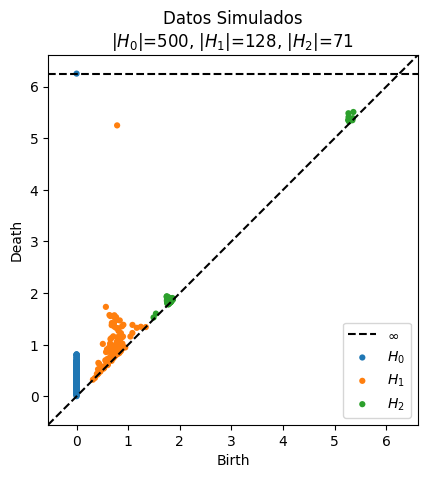

In [13]:
Data = np.asarray(Data)
dgm_X = ripser.ripser(Data,maxdim=2)['dgms'] # Computamos los diagramas de persistencia de los datos
persim.plot_diagrams(dgm_X, show=True,title=f"Datos Simulados\n{diagram_sizes(dgm_X)}")